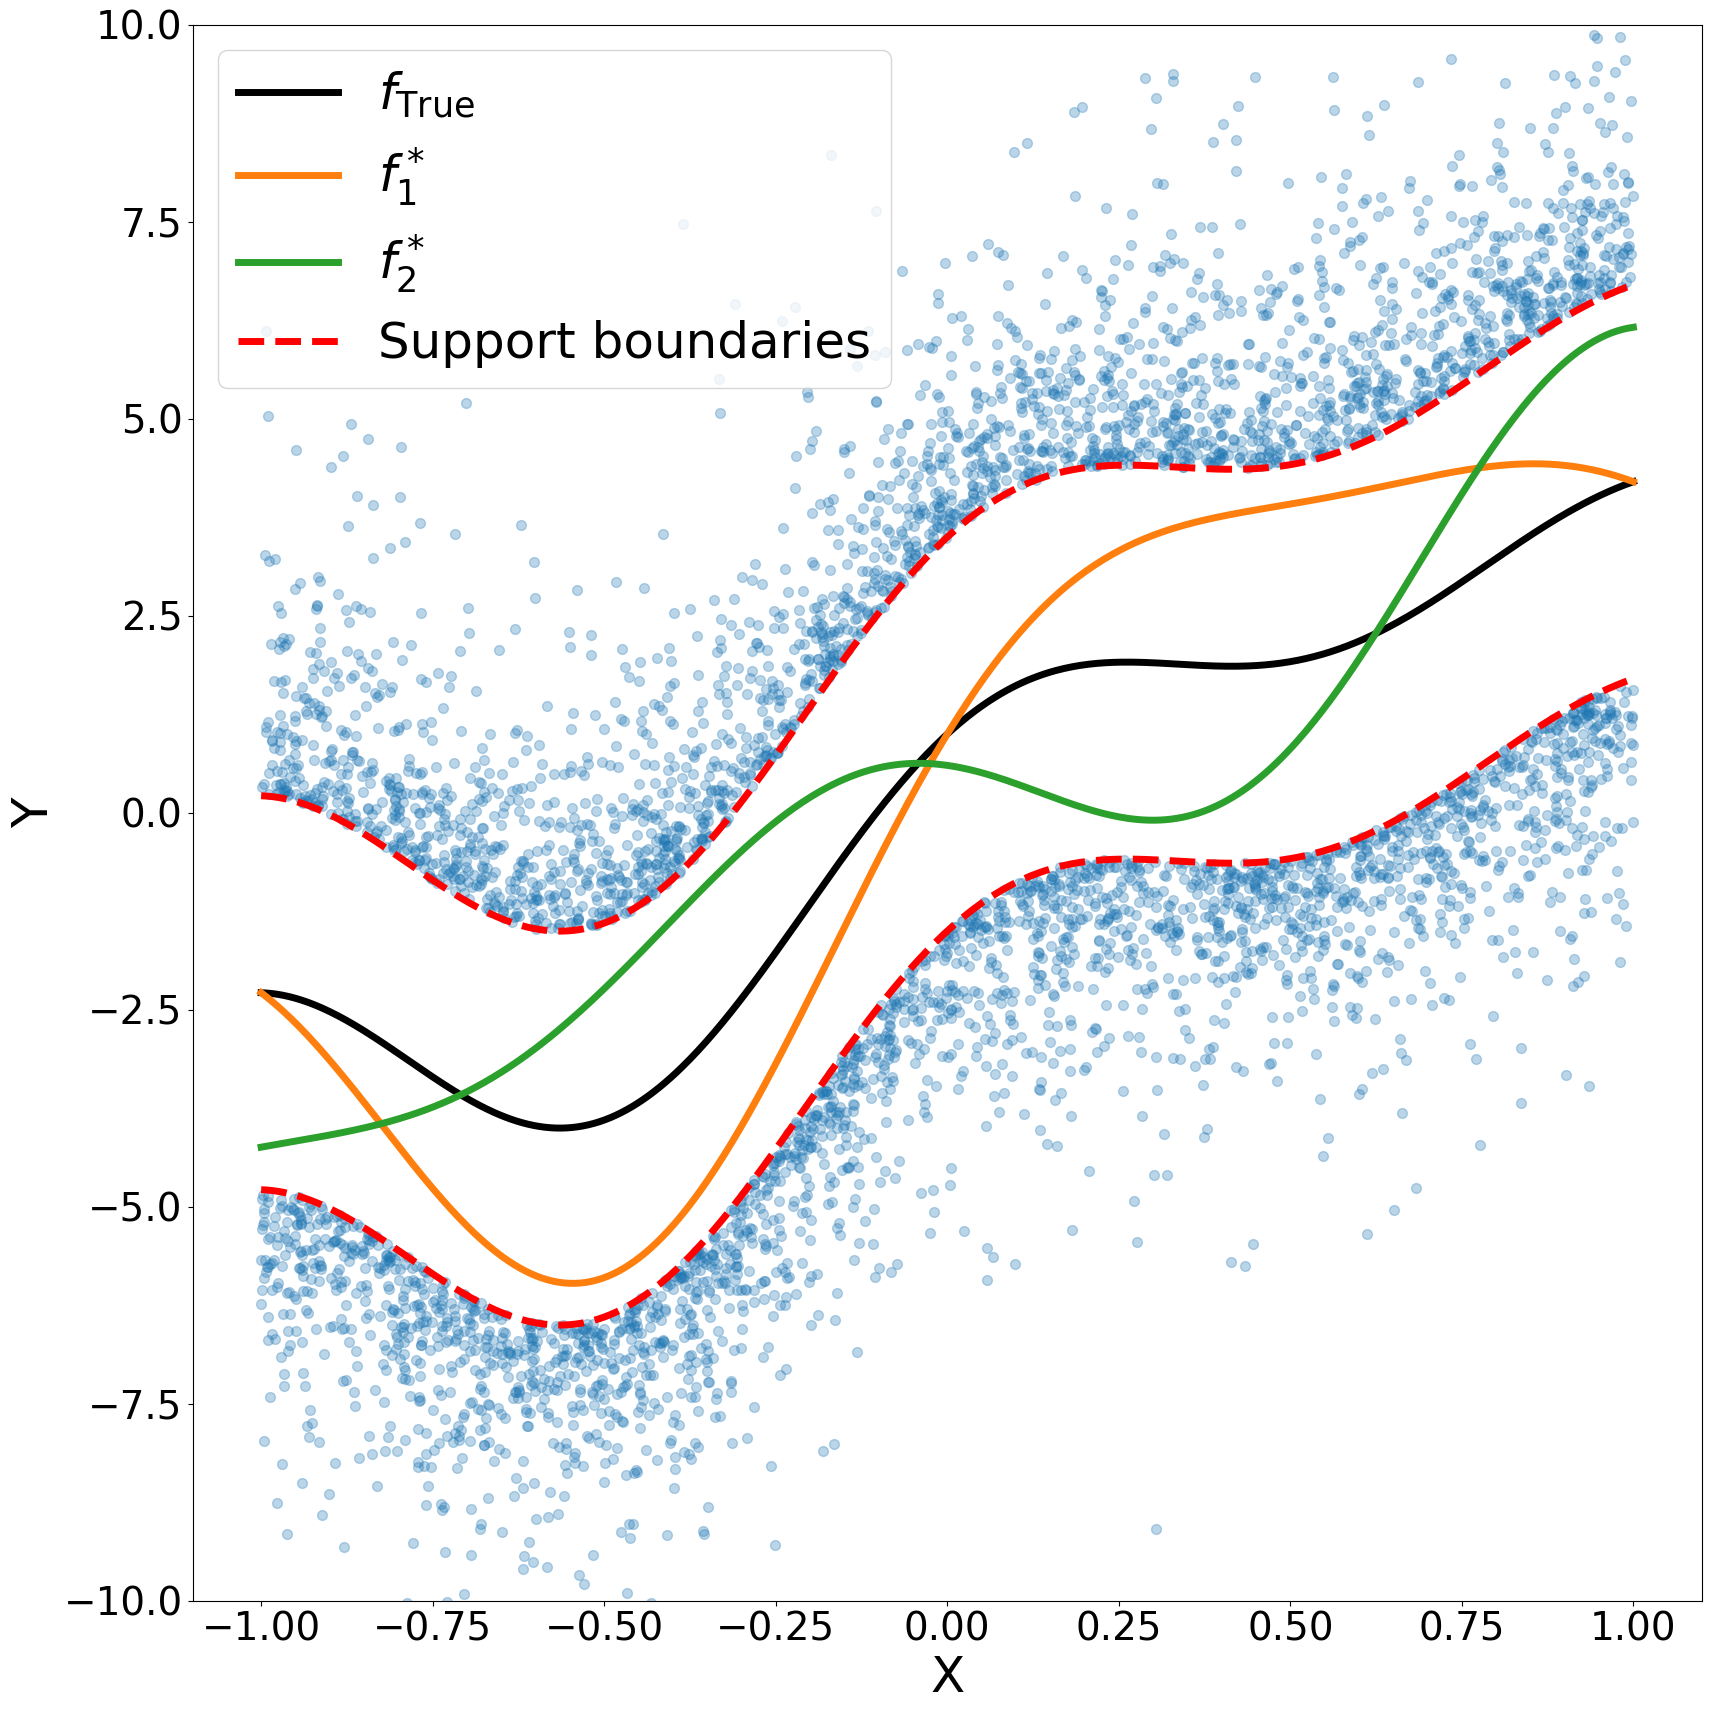

In [73]:
import numpy as np
import matplotlib.pyplot as plt

# Settings
np.random.seed(0)
N = 5000
gap = 5.0
half_gap = gap / 2

# Base regression function
a, b = 4, 6
def f_base(x):
    return 4*x + np.sin(a * x) + np.cos(b * x)

# Shift functions within [-half_gap, half_gap]
def g1(x):
    return 2.0 * np.sin(np.pi * x)

def g2(x):
    return 2.0 * np.sin(1.5*np.pi * x+0.2)

# Variant regression functions
def f1(x):
    return f_base(x) + g1(x)

def f2(x):
    return f_base(x) - g2(x)

# Sample data
X = np.random.uniform(-1, 1, size=N)
u = np.random.rand(N)
eps = np.where(
    u < 0.5,
    -half_gap - np.random.gamma(1, 1, size=N),
    half_gap + np.random.gamma(1, 1, size=N)
)
Y = f_base(X) + eps

# Compute support boundaries based on base f
xs = np.linspace(-1, 1, 500)
y_lower = f_base(xs) - half_gap
y_upper = f_base(xs) + half_gap

# Plot
plt.figure(figsize=(18,18))
plt.scatter(X, Y, s=50, alpha=0.3)
plt.plot(xs, f_base(xs), color='black', linewidth=5, label=r'$f_{\text{True}}$')
plt.plot(xs, f1(xs), color='C1', linestyle='-', linewidth=5, label=r'$f^*_{1}$')
plt.plot(xs, f2(xs), color='C2', linestyle='-', linewidth=5, label=r'$f^*_{2}$')
plt.plot(xs, y_lower, color='red', linestyle='--', label='Support boundaries', lw = 5)
plt.plot(xs, y_upper, color='red', linestyle='--', lw = 5)
plt.xlabel('X', fontsize = 36)
plt.ylabel('Y', fontsize = 36)
plt.xticks(fontsize = 28)
plt.yticks(fontsize = 28)
#plt.title('Data and support boundaries with alternative functions', )
plt.legend(loc='upper left', fontsize = 36)
plt.ylim(-10, 10)
plt.tight_layout()
plt.savefig("laplaceinvariance1d.png", bbox_inches = "tight")
plt.show()

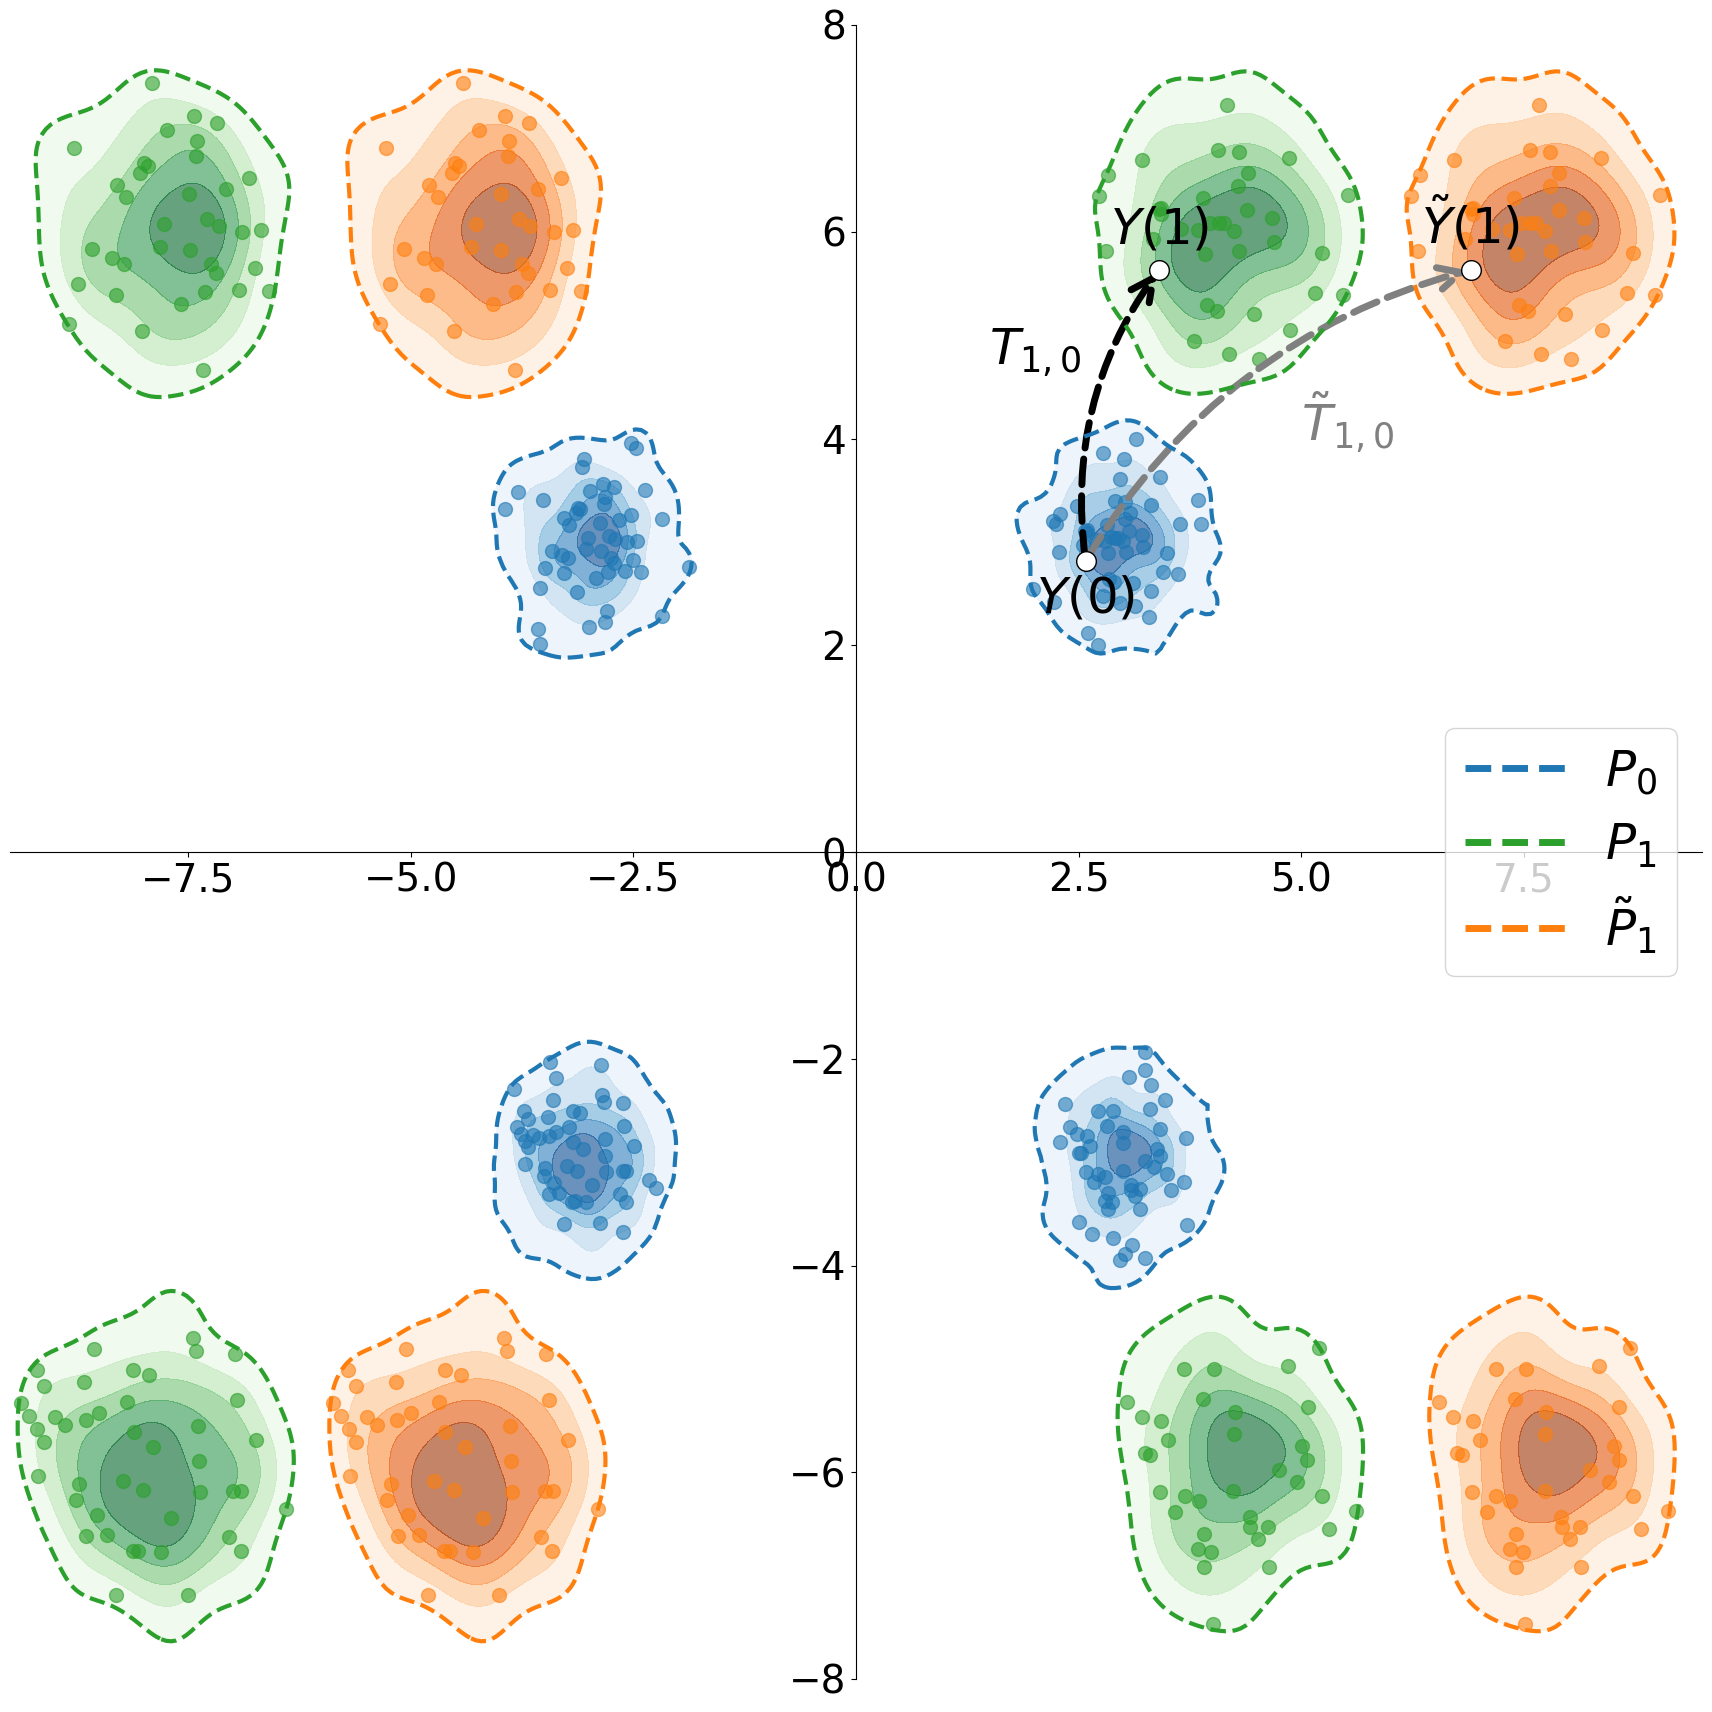

In [94]:
# Regenerate the filtered clusters for Y(1) and shifted Y(1) to ensure all points are within KDE support

# Filtered storage
clusters_Y1_filtered, clusters_Y1_shift_filtered = [], []

for sel, full_pts in zip(scatter_points, clusters_U):
    # Full KDEs from original clusters
    transformed_Y1 = scale_factor * full_pts + np.array([delta_x, 0])
    kde_Y1 = gaussian_kde(transformed_Y1.T)

    Y1 = scale_factor * sel + np.array([delta_x, 0])
    mask_Y1 = kde_Y1(Y1.T) >= level
    Y1_filtered = Y1[mask_Y1]
    clusters_Y1_filtered.append(Y1_filtered)

    # Shifted version
    transformed_Y1s = transformed_Y1 + np.array([additional_shift_x, additional_shift_y])
    kde_Y1s = gaussian_kde(transformed_Y1s.T)

    Y1s = Y1 + np.array([additional_shift_x, additional_shift_y])
    mask_Y1s = kde_Y1s(Y1s.T) >= level
    Y1s_filtered = Y1s[mask_Y1s]
    clusters_Y1_shift_filtered.append(Y1s_filtered)

# Recreate KDEs from full clouds (for contour shading)
kdes_Y1_fixed = [gaussian_kde((scale_factor * pts + np.array([delta_x, 0])).T) for pts in clusters_U]
kdes_Y1s_fixed = [gaussian_kde((scale_factor * pts + np.array([delta_x + additional_shift_x, additional_shift_y])).T) for pts in clusters_U]

# Redraw plot with filtered points
fig, ax = plt.subplots(figsize=(18, 18))

# Plot Y(0)
for kde, sel in zip(kdes_U, scatter_points):
    Z = kde(coords).reshape(Xg.shape)
    levels = np.linspace(level, Z.max(), 6)
    ax.contourf(Xg, Yg, Z, levels=levels, cmap='Blues', alpha=0.6)
    ax.contour(Xg, Yg, Z, levels=[level], colors='C0', linestyles='--', linewidths=3)
    ax.scatter(sel[:, 0], sel[:, 1], s=100, color='C0', alpha=0.6)

# Plot filtered Y(1)
for kde, scatter in zip(kdes_Y1_fixed, clusters_Y1_filtered):
    Z = kde(coords).reshape(Xg.shape)
    levels = np.linspace(level, Z.max(), 6)
    ax.contourf(Xg, Yg, Z, levels=levels, cmap='Greens', alpha=0.6)
    ax.contour(Xg, Yg, Z, levels=[level], colors='C2', linestyles='--', linewidths=3)
    ax.scatter(scatter[:, 0], scatter[:, 1], s=100, color='C2', alpha=0.6)

# Plot filtered Y(1) shifted
for kde, scatter in zip(kdes_Y1s_fixed, clusters_Y1_shift_filtered):
    Z = kde(coords).reshape(Xg.shape)
    levels = np.linspace(level, Z.max(), 6)
    ax.contourf(Xg, Yg, Z, levels=levels, cmap='Oranges', alpha=0.6)
    ax.contour(Xg, Yg, Z, levels=[level], colors='C1', linestyles='--', linewidths=3)
    ax.scatter(scatter[:, 0], scatter[:, 1], s=100, color='C1', alpha=0.6)

# Special points and arrows
anchor = scatter_points[0][0]
target1 = clusters_Y1_filtered[0][0]
target2 = clusters_Y1_shift_filtered[0][0]
ax.scatter(anchor[0], anchor[1], s=200, color='white', edgecolor="black", zorder=5)
ax.text(anchor[0], anchor[1]-0.5, r'$Y(0)$', ha='center', fontsize=36)
ax.scatter(target1[0], target1[1], s=200, color='white', edgecolor="black", zorder=5)
ax.text(target1[0], target1[1]+0.25, r'$Y(1)$', ha='center', fontsize=36)
ax.scatter(target2[0], target2[1], s=200, color='white', edgecolor="black", zorder=5)
ax.text(target2[0], target2[1]+0.25, r'$\tilde{Y}(1)$', ha='center', fontsize=36)

arrow1 = FancyArrowPatch(anchor, target1, arrowstyle='->', mutation_scale=40,
                         connectionstyle="arc3,rad=-0.2", color='black', lw=5, linestyle='--')
arrow2 = FancyArrowPatch(anchor, target2, arrowstyle='->', mutation_scale=40,
                         connectionstyle="arc3,rad=-0.2", color='grey', lw=5, linestyle='--')
ax.add_patch(arrow1)
ax.add_patch(arrow2)
mid1 = (anchor + target1) / 2
mid2 = (anchor + target2) / 2
ax.text(mid1[0]-1.5, mid1[1]+0.5, r'$T_{1,0}$', fontsize=36)
ax.text(mid2[0]+0.25, mid2[1]-0.25, r'$\tilde{T}_{1,0}$', fontsize=36, color="grey")

# Axes
ax.spines['left'].set_position('zero')
ax.spines['bottom'].set_position('zero')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_xlim(-9.5, 9.5)
ax.set_ylim(-8, 8)

# Legend
u_line = plt.Line2D([0], [0], color='C0', linestyle='--', lw=5)
y1_line = plt.Line2D([0], [0], color='C2', linestyle='--', lw=5)
y1s_line = plt.Line2D([0], [0], color='C1', linestyle='--', lw=5)
ax.legend([u_line, y1_line, y1s_line],
          [r'$P_0$', r'$P_1$', r'$\tilde P_1$'], fontsize = 36)

plt.tight_layout()
plt.savefig("laplaceinvariance2d.png", bbox_inches="tight")
plt.show()

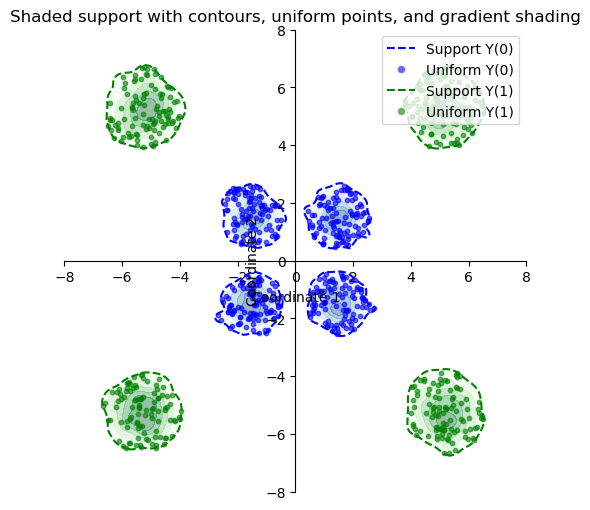

In [21]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde

# Settings
np.random.seed(0)
N = 500               # Gaussian samples per quadrant
U_uniform_N = 100     # Uniform samples per region
level = 0.05          # base contour level
scale_factor = 1.5
shift_mag = 3.0       # increased shift magnitude
centers = [(1.5, 1.5), (-1.5, 1.5), (-1.5, -1.5), (1.5, -1.5)]
cov = np.diag([0.2, 0.2])

# Generate Gaussian clusters for U (Y(0)) per quadrant
clusters_U = [np.random.multivariate_normal(center, cov, size=N) for center in centers]
kdes_U = [gaussian_kde(pts.T) for pts in clusters_U]

# Generate clusters for Y(1) by scaling+shifting each U cluster
clusters_Y1 = []
for pts, (cx, cy) in zip(clusters_U, centers):
    sx = np.sign(cx) * shift_mag
    sy = np.sign(cy) * shift_mag
    clusters_Y1.append(scale_factor * pts + np.array([sx, sy]))
kdes_Y1 = [gaussian_kde(pts.T) for pts in clusters_Y1]

# Prepare grid
grid_x = np.linspace(-8, 8, 400)
grid_y = np.linspace(-8, 8, 400)
Xg, Yg = np.meshgrid(grid_x, grid_y)
coords = np.vstack([Xg.ravel(), Yg.ravel()])

# Plot
fig, ax = plt.subplots(figsize=(6, 6))

# Plot U support with gradient shading and uniform points
for kde, pts in zip(kdes_U, clusters_U):
    Z = kde(coords).reshape(Xg.shape)
    # gradient shading: multiple levels
    levels = np.linspace(level, Z.max(), 6)
    ax.contourf(Xg, Yg, Z, levels=levels, cmap='Blues', alpha=0.4)
    # dashed boundary at base level
    ax.contour(Xg, Yg, Z, levels=[level], colors='blue', linestyles='--', linewidths=1.5)
    # uniform points within region Z>=level
    # sample uniform in bounding box
    x_min, x_max = pts[:,0].min(), pts[:,0].max()
    y_min, y_max = pts[:,1].min(), pts[:,1].max()
    uni_pts = []
    while len(uni_pts) < U_uniform_N:
        u = np.random.uniform(x_min, x_max)
        v = np.random.uniform(y_min, y_max)
        if kde((u, v)) >= level:
            uni_pts.append((u, v))
    uni_pts = np.array(uni_pts)
    ax.scatter(uni_pts[:,0], uni_pts[:,1], s=10, color='blue', alpha=0.6)

# Plot Y(1) support with gradient shading and uniform points
for kde, pts, (cx, cy) in zip(kdes_Y1, clusters_Y1, centers):
    Z = kde(coords).reshape(Xg.shape)
    levels = np.linspace(level, Z.max(), 6)
    ax.contourf(Xg, Yg, Z, levels=levels, cmap='Greens', alpha=0.4)
    ax.contour(Xg, Yg, Z, levels=[level], colors='green', linestyles='--', linewidths=1.5)
    # uniform points
    x_min, x_max = pts[:,0].min(), pts[:,0].max()
    y_min, y_max = pts[:,1].min(), pts[:,1].max()
    uni_pts = []
    while len(uni_pts) < U_uniform_N:
        u = np.random.uniform(x_min, x_max)
        v = np.random.uniform(y_min, y_max)
        if kde((u, v)) >= level:
            uni_pts.append((u, v))
    uni_pts = np.array(uni_pts)
    ax.scatter(uni_pts[:,0], uni_pts[:,1], s=10, color='green', alpha=0.6)

# Crosshair axes
ax.spines['left'].set_position('zero')
ax.spines['bottom'].set_position('zero')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.set_xlim(-8, 8)
ax.set_ylim(-8, 8)
ax.set_aspect('equal', 'box')
ax.set_xlabel('Coordinate 1')
ax.set_ylabel('Coordinate 2')
ax.set_title('Shaded support with contours, uniform points, and gradient shading')

# Legend
blue_patch = plt.Line2D([0], [0], color='blue', linestyle='--', linewidth=1.5)
green_patch = plt.Line2D([0], [0], color='green', linestyle='--', linewidth=1.5)
blue_pts = plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='blue', markersize=6, alpha=0.6)
green_pts = plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='green', markersize=6, alpha=0.6)
ax.legend([blue_patch, blue_pts, green_patch, green_pts],
          ['Support Y(0)', 'Uniform Y(0)', 'Support Y(1)', 'Uniform Y(1)'],
          loc='upper right')

plt.show()